# Phân tích theo từ khoá

In [60]:
import pandas as pd
from collections import Counter
import re
trending_videos_unique = pd.read_csv('Data/trending_videos_unique.csv',index_col=False)

<Axes: ylabel='tag'>

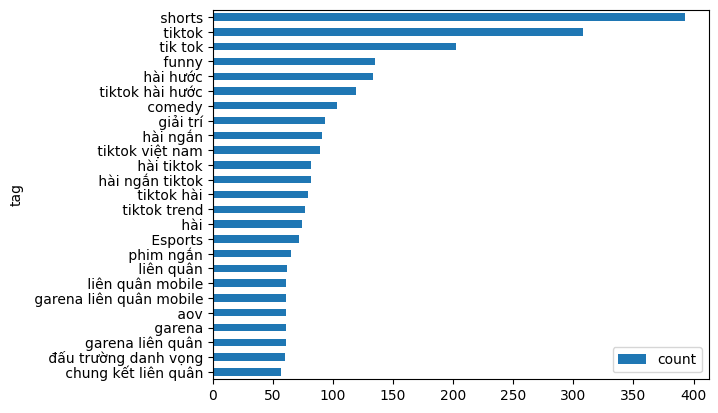

In [61]:
video_tags = trending_videos_unique.loc[::,'video_tags']
video_tags = video_tags.dropna()
tags_list = []
for tagline in video_tags:
    tags_list.extend(tagline.split(','))
count_tags = Counter(tags_list)
tags_df = pd.DataFrame(count_tags.items(),columns=['tag','count'])
tags_df_sort = tags_df.sort_values('count',ascending=True)
tags_df_sort.tail(25).set_index('tag').plot(kind='barh')

<Axes: xlabel='len'>

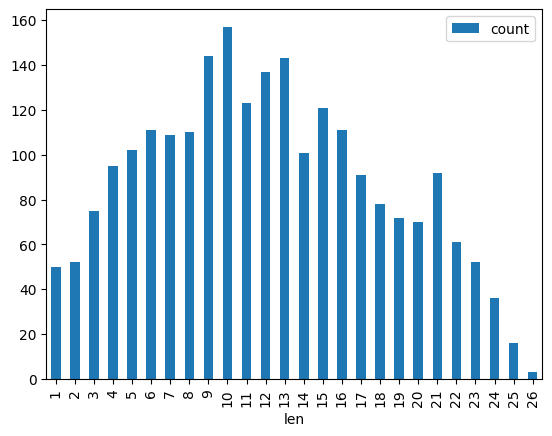

In [62]:
titles = trending_videos_unique['title']
def clean_title(title):
    return re.sub(r'[^\w\s]', '', title, flags=re.UNICODE)
def get_len_title(title):
    title = title.strip()
    return len(title.split(' '))
cleaned_title = titles.apply(clean_title)
len_titles = cleaned_title.apply(get_len_title)
count_len = Counter(len_titles)
len_df = pd.DataFrame(count_len.items(),columns=['len','count'])
len_df.set_index('len').sort_values('len',ascending=True).plot(kind='bar')